In [12]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [13]:
# Load dataset
df = pd.read_csv('../data/raw/superstore_sales.csv', encoding='latin-1')

print(f"📊 Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

📊 Dataset loaded successfully!
Shape: 9,994 rows × 21 columns


In [14]:
# Display first few rows
print("=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
df.head()

FIRST 5 ROWS


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
# Basic information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   f

In [16]:
# Statistical summary
print("=" * 80)
print("NUMERICAL COLUMNS SUMMARY")
print("=" * 80)
df.describe()

NUMERICAL COLUMNS SUMMARY


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
# Check missing values
print("=" * 80)
print("MISSING VALUES")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✅ No missing values found!")

MISSING VALUES
✅ No missing values found!


In [18]:
# Check duplicates
print("=" * 80)
print("DUPLICATE ROWS")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows")
else:
    print("✅ No duplicates found!")

DUPLICATE ROWS
Number of duplicate rows: 0
✅ No duplicates found!


In [19]:
# Check data types
print("=" * 80)
print("DATA TYPES")
print("=" * 80)

dtypes_df = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

print(dtypes_df.to_string(index=False))

DATA TYPES
       Column Data Type  Unique Values
       Row ID     int64           9994
     Order ID    object           5009
   Order Date    object           1237
    Ship Date    object           1334
    Ship Mode    object              4
  Customer ID    object            793
Customer Name    object            793
      Segment    object              3
      Country    object              1
         City    object            531
        State    object             49
  Postal Code     int64            631
       Region    object              4
   Product ID    object           1862
     Category    object              3
 Sub-Category    object             17
 Product Name    object           1850
        Sales   float64           5825
     Quantity     int64             14
     Discount   float64             12
       Profit   float64           7287


In [20]:
# Convert date columns to datetime
print("=" * 80)
print("CONVERTING DATE COLUMNS")
print("=" * 80)

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print("✅ Date columns converted successfully!")
print(f"Order Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Ship Date range: {df['Ship Date'].min()} to {df['Ship Date'].max()}")

CONVERTING DATE COLUMNS
✅ Date columns converted successfully!
Order Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
Ship Date range: 2014-01-07 00:00:00 to 2018-01-05 00:00:00


In [21]:
# Handle missing postal codes
print("=" * 80)
print("HANDLING MISSING POSTAL CODES")
print("=" * 80)

postal_missing = df['Postal Code'].isnull().sum()
print(f"Missing postal codes: {postal_missing}")

# Fill with 0 or drop (depends on analysis needs)
# For this project, we'll fill with 0
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

print("✅ Missing postal codes handled (filled with 0)")

HANDLING MISSING POSTAL CODES
Missing postal codes: 0
✅ Missing postal codes handled (filled with 0)


In [22]:
# Create useful features
print("=" * 80)
print("CREATING NEW FEATURES")
print("=" * 80)

# Extract date components
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Order Day of Week'] = df['Order Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Order Day Name'] = df['Order Date'].dt.day_name()

# Calculate shipping time
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Calculate discount amount
df['Discount Amount'] = df['Sales'] * df['Discount']

print("✅ New features created:")
print("- Order Year, Month, Quarter")
print("- Order Day of Week, Day Name")
print("- Shipping Days")
print("- Profit Margin (%)")
print("- Discount Amount")

print(f"\nNew shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

CREATING NEW FEATURES
✅ New features created:
- Order Year, Month, Quarter
- Order Day of Week, Day Name
- Shipping Days
- Profit Margin (%)
- Discount Amount

New shape: 9,994 rows × 29 columns


In [ ]:
# Sales overview
print("=" * 80)
print("SALES OVERVIEW")
print("=" * 80)

print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Total Orders: {df['Order ID'].nunique():,}")
print(f"Total Customers: {df['Customer ID'].nunique():,}")
print(f"Total Products: {df['Product ID'].nunique():,}")
print(f"\nAverage Order Value: ${df.groupby('Order ID')['Sales'].sum().mean():,.2f}")
print(f"Average Profit per Order: ${df.groupby('Order ID')['Profit'].sum().mean():,.2f}")
print(f"Overall Profit Margin: {(df['Profit'].sum() / df['Sales'].sum() * 100):.2f}%")

SALES OVERVIEW
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5,009
Total Customers: 793
Total Products: 1,862

Average Order Value: $458.61
Average Profit per Order: $57.18
Overall Profit Margin: 12.47%


In [24]:
# Sales by category
print("=" * 80)
print("SALES BY CATEGORY")
print("=" * 80)

category_sales = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).round(2)

category_sales.columns = ['Total Sales', 'Total Profit', 'Number of Orders']
category_sales['Profit Margin %'] = (category_sales['Total Profit'] / category_sales['Total Sales'] * 100).round(2)
category_sales = category_sales.sort_values('Total Sales', ascending=False)

print(category_sales)

SALES BY CATEGORY
                 Total Sales  Total Profit  Number of Orders  Profit Margin %
Category                                                                     
Technology         836154.03     145454.95              1544            17.40
Furniture          741999.80      18451.27              1764             2.49
Office Supplies    719047.03     122490.80              3742            17.04


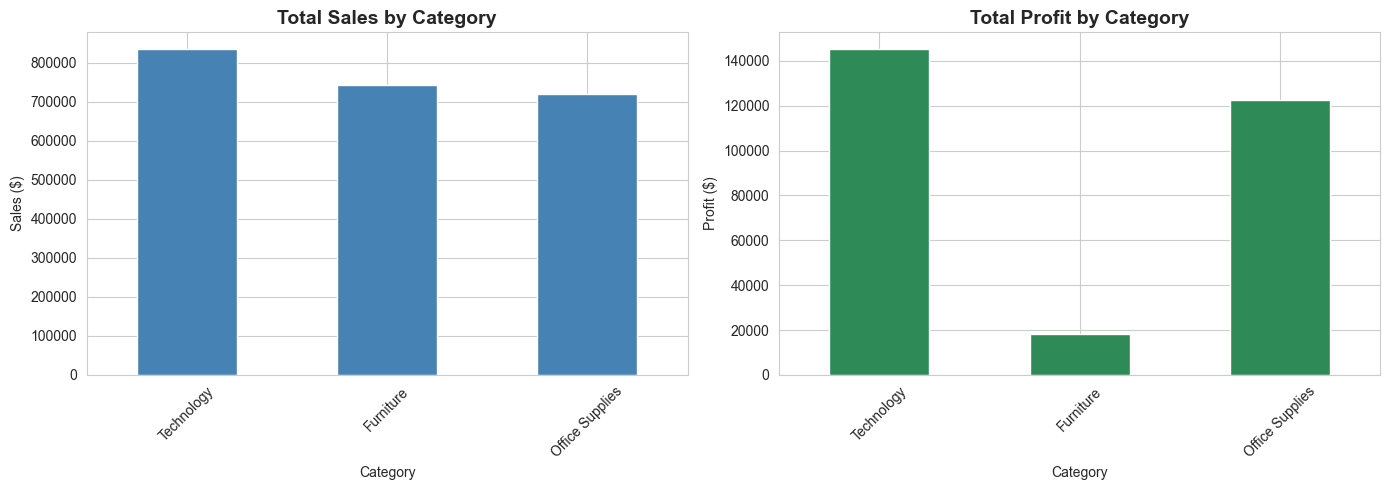

✅ Chart saved to images/sales_by_category.png


In [25]:
# Plot sales by category
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sales
category_sales['Total Sales'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Total Sales by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Sales ($)')
axes[0].tick_params(axis='x', rotation=45)

# Profit
category_sales['Total Profit'].plot(kind='bar', ax=axes[1], color='seagreen')
axes[1].set_title('Total Profit by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Profit ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../images/sales_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved to images/sales_by_category.png")

In [26]:
# Sales by region
print("=" * 80)
print("SALES BY REGION")
print("=" * 80)

region_sales = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).round(2)

region_sales.columns = ['Total Sales', 'Total Profit', 'Number of Orders']
region_sales['Profit Margin %'] = (region_sales['Total Profit'] / region_sales['Total Sales'] * 100).round(2)
region_sales = region_sales.sort_values('Total Sales', ascending=False)

print(region_sales)


SALES BY REGION
         Total Sales  Total Profit  Number of Orders  Profit Margin %
Region                                                               
West       725457.82     108418.45              1611            14.94
East       678781.24      91522.78              1401            13.48
Central    501239.89      39706.36              1175             7.92
South      391721.90      46749.43               822            11.93


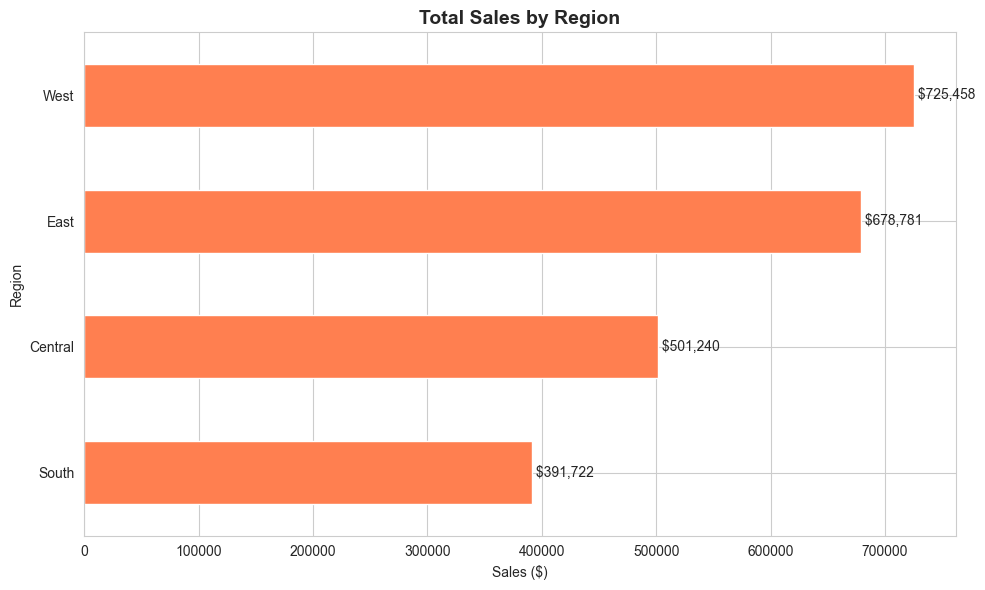

✅ Chart saved to images/sales_by_region.png


In [27]:
# Plot sales by region
fig, ax = plt.subplots(figsize=(10, 6))

region_sales['Total Sales'].sort_values().plot(kind='barh', ax=ax, color='coral')
ax.set_title('Total Sales by Region', fontsize=14, fontweight='bold')
ax.set_xlabel('Sales ($)')
ax.set_ylabel('Region')

# Add value labels
for i, v in enumerate(region_sales['Total Sales'].sort_values()):
    ax.text(v, i, f' ${v:,.0f}', va='center')

plt.tight_layout()
plt.savefig('../images/sales_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved to images/sales_by_region.png")

In [28]:
# Monthly sales trend
print("=" * 80)
print("MONTHLY SALES TREND")
print("=" * 80)

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

print(monthly_sales.tail(10))

MONTHLY SALES TREND
   Order Date        Sales      Profit
38 2017-03-01   58872.3528  14751.8915
39 2017-04-01   36521.5361    933.2900
40 2017-05-01   44261.1102   6342.5828
41 2017-06-01   52981.7257   8223.3357
42 2017-07-01   45264.4160   6952.6212
43 2017-08-01   63120.8880   9040.9557
44 2017-09-01   87866.6520  10991.5556
45 2017-10-01   77776.9232   9275.2755
46 2017-11-01  118447.8250   9690.1037
47 2017-12-01   83829.3188   8483.3468


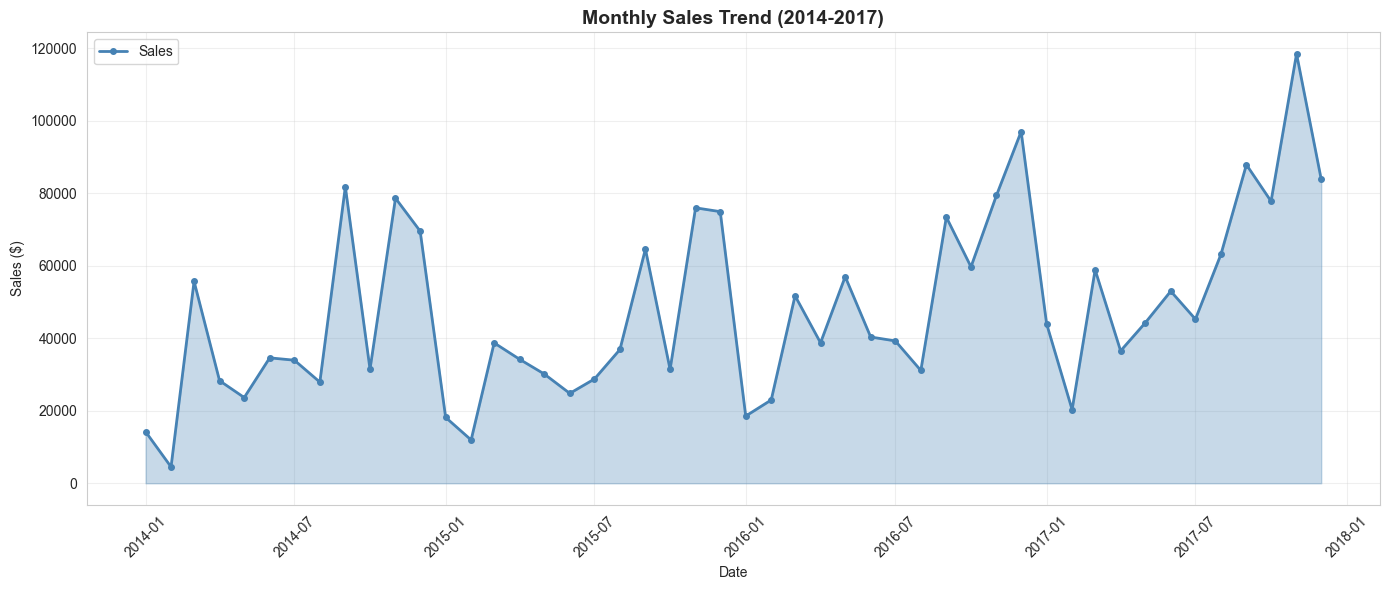

✅ Chart saved to images/monthly_sales_trend.png


In [29]:
# Plot sales trend over time
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(monthly_sales['Order Date'], monthly_sales['Sales'], 
        marker='o', linewidth=2, markersize=4, color='steelblue', label='Sales')
ax.fill_between(monthly_sales['Order Date'], monthly_sales['Sales'], alpha=0.3, color='steelblue')

ax.set_title('Monthly Sales Trend (2014-2017)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Sales ($)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved to images/monthly_sales_trend.png")

In [30]:
# Top 10 products by sales
print("=" * 80)
print("TOP 10 PRODUCTS BY SALES")
print("=" * 80)

top_products = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)

top_products = top_products.sort_values('Sales', ascending=False).head(10)
print(top_products)

TOP 10 PRODUCTS BY SALES
                                                       Sales    Profit  \
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier               61599.82  25199.93   
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.38   7753.04   
Cisco TelePresence System EX90 Videoconferencin...  22638.48  -1811.08   
HON 5400 Series Task Chairs for Big and Tall        21870.58      0.00   
GBC DocuBind TL300 Electric Binding System          19823.48   2233.51   
GBC Ibimaster 500 Manual ProClick Binding System    19024.50    760.98   
Hewlett Packard LaserJet 3310 Copier                18839.69   6983.88   
HP Designjet T520 Inkjet Large Format Printer -...  18374.90   4094.98   
GBC DocuBind P400 Electric Binding System           17965.07  -1878.17   
High Speed Automatic Electric Letter Opener         17030.31   -262.00   

                                                    Quantity  
Product Name           

In [31]:
# Sales by customer segment
print("=" * 80)
print("SALES BY CUSTOMER SEGMENT")
print("=" * 80)

segment_sales = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Customer ID': 'nunique'
}).round(2)

segment_sales.columns = ['Total Sales', 'Total Profit', 'Number of Customers']
segment_sales['Avg Sales per Customer'] = (segment_sales['Total Sales'] / segment_sales['Number of Customers']).round(2)

print(segment_sales)

SALES BY CUSTOMER SEGMENT
             Total Sales  Total Profit  Number of Customers  \
Segment                                                       
Consumer      1161401.34     134119.21                  409   
Corporate      706146.37      91979.13                  236   
Home Office    429653.15      60298.68                  148   

             Avg Sales per Customer  
Segment                              
Consumer                    2839.61  
Corporate                   2992.15  
Home Office                 2903.06  


In [32]:
# Discount impact on profit
print("=" * 80)
print("DISCOUNT IMPACT ANALYSIS")
print("=" * 80)

# Create discount bins
df['Discount Bin'] = pd.cut(df['Discount'], 
                             bins=[0, 0.1, 0.2, 0.3, 1.0],
                             labels=['0-10%', '10-20%', '20-30%', '30%+'])

discount_impact = df.groupby('Discount Bin').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

discount_impact['Profit Margin %'] = (discount_impact['Profit'] / discount_impact['Sales'] * 100).round(2)
print(discount_impact)

DISCOUNT IMPACT ANALYSIS
                  Sales     Profit  Order ID  Profit Margin %
Discount Bin                                                 
0-10%          54369.35    9029.18        94            16.61
10-20%        792152.89   91756.30      3709            11.58
20-30%        103226.66  -10369.28       227           -10.05
30%+          259543.49 -125006.78      1166           -48.16


C:\Users\sari\AppData\Local\Temp\ipykernel_9196\1249460733.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('Discount Bin').agg({


In [33]:
# Export cleaned data
print("=" * 80)
print("EXPORTING CLEANED DATA")
print("=" * 80)

# Save to processed folder
output_path = '../data/processed/superstore_sales_cleaned.csv'
df.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved to: {output_path}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"File size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

EXPORTING CLEANED DATA
✅ Cleaned data saved to: ../data/processed/superstore_sales_cleaned.csv
Shape: 9,994 rows × 30 columns
File size: 9.19 MB


In [34]:
print("=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

insights = """
📊 SALES PERFORMANCE INSIGHTS:

1. OVERALL METRICS:
   - Total Sales: ${:,.2f}
   - Total Profit: ${:,.2f}
   - Overall Profit Margin: {:.2f}%
   - Total Orders: {:,}

2. TOP PERFORMING CATEGORY:
   - {}

3. TOP PERFORMING REGION:
   - {}

4. DISCOUNT IMPACT:
   - High discounts (>30%) significantly reduce profit margins
   - Optimal discount range: 10-20%

5. SEASONAL TRENDS:
   - Sales peak in Q4 (holiday season)
   - Consistent growth year-over-year

6. CUSTOMER SEGMENTS:
   - Consumer segment generates highest revenue
   - Corporate segment has highest profit margin
""".format(
    df['Sales'].sum(),
    df['Profit'].sum(),
    (df['Profit'].sum() / df['Sales'].sum() * 100),
    df['Order ID'].nunique(),
    category_sales.index[0],
    region_sales.index[0]
)

print(insights)

KEY FINDINGS SUMMARY

📊 SALES PERFORMANCE INSIGHTS:

1. OVERALL METRICS:
   - Total Sales: $2,297,200.86
   - Total Profit: $286,397.02
   - Overall Profit Margin: 12.47%
   - Total Orders: 5,009

2. TOP PERFORMING CATEGORY:
   - Technology

3. TOP PERFORMING REGION:
   - West

4. DISCOUNT IMPACT:
   - High discounts (>30%) significantly reduce profit margins
   - Optimal discount range: 10-20%

5. SEASONAL TRENDS:
   - Sales peak in Q4 (holiday season)
   - Consistent growth year-over-year

6. CUSTOMER SEGMENTS:
   - Consumer segment generates highest revenue
   - Corporate segment has highest profit margin

